# Department Product The Look - Adeline

# 1. Business Understanding

The Look adalah situs pakaian eCommerce fiktif yang dikembangkan oleh tim Looker. Dataset berisi informasi tentang pelanggan, produk, pesanan, logistik, acara web, dan kampanye pemasaran digital. Isi dari kumpulan data ini adalah sintetis, dan diberikan kepada praktisi industri untuk tujuan penemuan, pengujian, dan evaluasi produk.

Tujuannya:Untuk meningkatkan penjualan, perlu dilakukan pengawasan atau controlling product pada e-commerce The Look.

What: Pemantauan dan evaluasi produk pada e-commerce The Look 

When: 2019-2022

Where: perusahaan The Look

Who: produk

Why: Dengan pemantauan dan evaluasi produk, dapat membantu meningkatkan penjualan dan menyediakan produk sesuai minat pembeli.

How: Melihat dan mengevaluasi produk yang tersedia dan produk yang banyak terjual.

# 2. Data Understanding

## Import Library

In [1]:
from pprint import pprint
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

##  Data

In [2]:
df=pd.read_csv('https://docs.google.com/uc?export=download&id=1Q2HNlB5oQNpbmJ9h8PcXR-DLe8e3uxx_')
df

,id,product_distribution_center_id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,name,latitude,longitude
0,1,3,16783,2019-05-23,2019-07-20,28.325000,Tops & Tees,Calvin Klein Sportswear Men's Slim Fit Longsle...,Calvin Klein,55.000000,Men,Houston TX,29.7604,-95.3698
1,2,3,16783,2020-11-08,NaN,28.325000,Tops & Tees,Calvin Klein Sportswear Men's Slim Fit Longsle...,Calvin Klein,55.000000,Men,Houston TX,29.7604,-95.3698
2,3,8,21357,2019-06-10,2019-07-21,35.095548,Jeans,RVCA Spanky II Denim Pant - Men's,RVCA,68.949997,Men,Mobile AL,30.6944,-88.0431
3,4,8,21357,2021-12-22,NaN,35.095548,Jeans,RVCA Spanky II Denim Pant - Men's,RVCA,68.949997,Men,Mobile AL,30.6944,-88.0431
4,5,8,21357,2020-04-19,NaN,35.095548,Jeans,RVCA Spanky II Denim Pant - Men's,RVCA,68.949997,Men,Mobile AL,30.6944,-88.0431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487389,487390,3,20796,2020-08-23,NaN,38.144549,Jeans,Cinch White Label Jeans for Men Relaxed Fit Li...,Cinch,69.989998,Men,Houston TX,29.7604,-95.3698
487390,487391,6,20039,2021-05-12,2021-06-08,22.096840,Suits & Sport Coats,Port Authority J790 Glacier Soft Shell Jacket,Port Authority,49.880001,Men,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
487391,487392,6,20039,2021-11-02,NaN,22.096840,Suits & Sport Coats,Port Authority J790 Glacier Soft Shell Jacket,Port Authority,49.880001,Men,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
487392,487393,6,20039,2020-03-22,NaN,22.096840,Suits & Sport Coats,Port Authority J790 Glacier Soft Shell Jacket,Port Authority,49.880001,Men,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834


In [ ]:
# Pilih indeks pertama pada df
df.loc[0]

id                                                                                1
product_distribution_center_id                                                    3
product_id                                                                    16783
created_at                                                               2019-05-23
sold_at                                                                  2019-07-20
cost                                                                         28.325
product_category                                                        Tops & Tees
product_name                      Calvin Klein Sportswear Men's Slim Fit Longsle...
product_brand                                                          Calvin Klein
product_retail_price                                                           55.0
product_department                                                              Men
name                                                                     Hou

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_distribution_center_id  487394 non-null  int64  
 2   product_id                      487394 non-null  int64  
 3   created_at                      487394 non-null  object 
 4   sold_at                         180508 non-null  object 
 5   cost                            487394 non-null  float64
 6   product_category                487394 non-null  object 
 7   product_name                    487359 non-null  object 
 8   product_brand                   487020 non-null  object 
 9   product_retail_price            487394 non-null  float64
 10  product_department              487394 non-null  object 
 11  name                            487394 non-null  object 
 12  latitude        

> **Insights:**

* Pada data, terdapat 13 fitur yang merepresentasikan informasi tentang inventory item tersebut, yaitu id, id distribusi produk, produk id, dan sebagainya.

* Hampir semua fitur tidak memiliki missing values. Hanya fitur `sold_at`, `sold_brand` dan `product_name` yang memiliki beberapa _missing values_ (sold_at: 180508 dari 487394), (product_brand: 487020 dari 487394), dan (product_name: 487359 dari 487394)

In [ ]:
df.dtypes

id                                  int64
product_distribution_center_id      int64
product_id                          int64
created_at                         object
sold_at                            object
cost                              float64
product_category                   object
product_name                       object
product_brand                      object
product_retail_price              float64
product_department                 object
name                               object
latitude                          float64
longitude                         float64
dtype: object

* Jika  dilihat, fitur `id`, `product_distribution_center_id`, `product_id`, `latitude`dan `longitude` bertipe data integer. Fitur tersebut seharusnya bertipe data kategorik karena tidak mencerminkan deret angka. Oleh karena itu, kita akan coba ubah tipe data fitur tersebut menjadi object.

* Untuk fitur `created_at` dan `sold_at`seharusnya berupa tanggal maka fitur tersebut harus diubah menjadi date.

# Data Preparation

In [4]:
# Instruksi looping untuk mengubah tipe data menggunakan function astype()
for feature in df.columns:
    if (
        feature.endswith("id")
        or feature.endswith("latitude")
        or feature.endswith("longitude")
    ):
        df[feature] = df[feature].astype("object")

In [5]:
#mengubah tipe data created_at
df["created_at"]=pd.to_datetime(df["created_at"])
dates = []
for i in df["created_at"]:
    i = i.date()
    dates.append(i)  
print("Tanggal masuk barang terbaru:",max(dates))
print("Tanggal masuk barang terlama:",min(dates))

Tanggal masuk barang terbaru: 2022-06-06
Tanggal masuk barang terlama: 2018-11-11


In [6]:
#mengubah tipe data sold_at
df["sold_at"]=pd.to_datetime(df["sold_at"])
dates = []
for i in df["sold_at"]:
    i = i.date()
    dates.append(i)  
print("Tanggal  barang terjual terbaru:",max(dates))
print("Tanggal  barang terjual terlama:",min(dates))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  import sys


Tanggal  barang terjual terbaru: 2022-06-06
Tanggal  barang terjual terlama: 2019-01-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  


dapat dilihat bahwa tipe data `id`, `product_distribution_center_id`, `latitude`dan `longitude`, `product_id`, `created_at`, dan `sold_at`sudah berubah

In [ ]:
df.dtypes

id                                        object
product_distribution_center_id            object
product_id                                object
created_at                        datetime64[ns]
sold_at                           datetime64[ns]
cost                                     float64
product_category                          object
product_name                              object
product_brand                             object
product_retail_price                     float64
product_department                        object
name                                      object
latitude                                  object
longitude                                 object
dtype: object

In [ ]:
print(df.isnull().sum())

id                                     0
product_distribution_center_id         0
product_id                             0
created_at                             0
sold_at                           306886
cost                                   0
product_category                       0
product_name                          35
product_brand                        374
product_retail_price                   0
product_department                     0
name                                   0
latitude                               0
longitude                              0
dtype: int64


In [ ]:
df.describe()

,cost,product_retail_price
count,487394.000000,487394.000000
mean,28.746374,59.772834
std,30.629290,65.871768
min,0.008300,0.020000
25%,11.394300,24.780001
50%,19.944301,39.990002
75%,34.698691,69.949997
max,557.151002,999.000000


> **Insight Describe:**

* **cost:**


1.   memiliki data total sebanyak 487394
2.   rata-rata nya adalah 28.746374
3. standar deviasi nya 30.629290
4. cost terkecil adalah 0.008300
5. cost tertinggi adalah 557.151002

* **product_retail_price:**


1.   memiliki data total sebanyak 487394
2.   rata-rata nya adalah 59.772834
3. standar deviasi nya 65.871868
4. harga terkecil adalah 0.02
5. harga tertinggi adalah 999.00

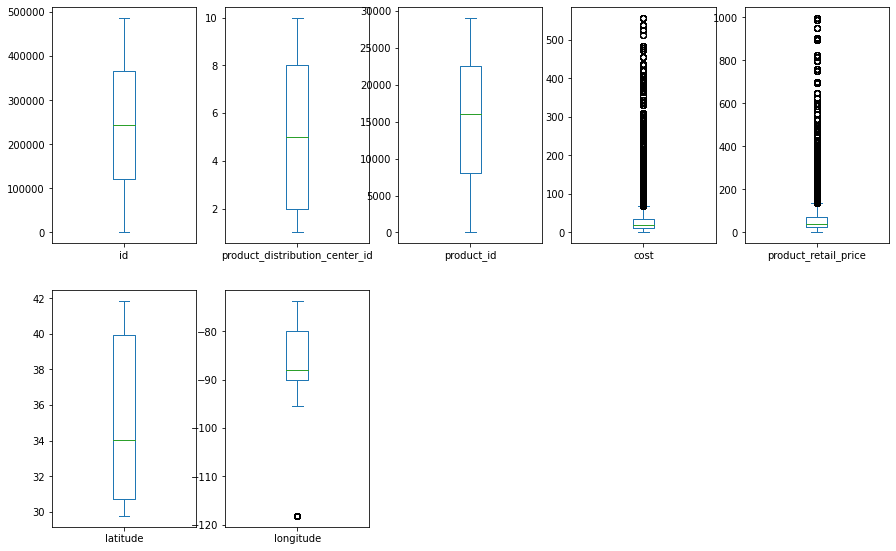

In [ ]:
#melihat outlier masing-masing 
df.plot(kind='box', subplots = True, layout = (4,5), figsize = (15,20))
plt.show()

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
487389    False
487390    False
487391    False
487392    False
487393    False
Length: 487394, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
corrdf=df[['cost','product_retail_price']].corr()
corrdf

,cost,product_retail_price
cost,1.000000,0.982524
product_retail_price,0.982524,1.000000


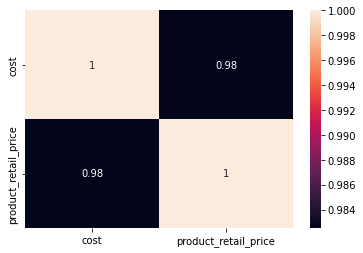

In [ ]:
sns.heatmap(corrdf, annot=True)

## Data Visualization

#### product category

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(50, 10), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

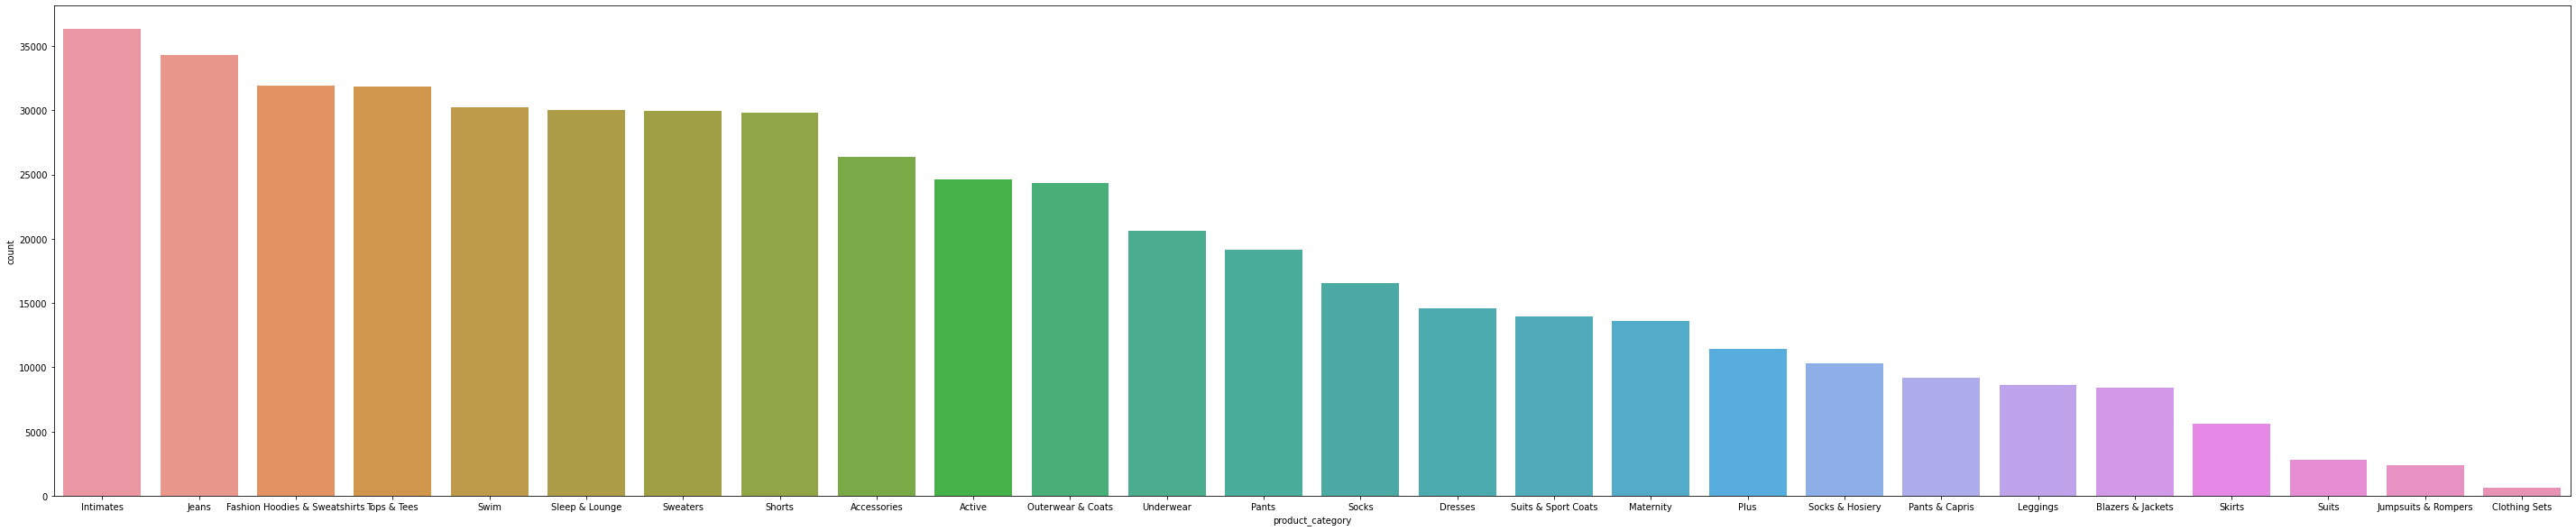

In [ ]:
plot_count(x='product_category', data=df)

> **Insights:**

Dari visualisasi di atas, diperoleh:
* `Intimates` atau pakaian untuk perempuan menjadi kelompok grup yang paling banyak disediakan oleh The Look

* sebaliknya, ketersediaan pakaian set atau `'clothing set'` oleh The Look paling sedikit dibandingkan dengan yang kelompok pakaian lainnya


In [ ]:
print(sum(df['product_category'].value_counts()))

487394


In [ ]:
#untuk melihat total users untuk masing-masing country
print(df['product_category'].value_counts())

Intimates                        36319
Jeans                            34319
Fashion Hoodies & Sweatshirts    31926
Tops & Tees                      31842
Swim                             30228
Sleep & Lounge                   30036
Sweaters                         29948
Shorts                           29838
Accessories                      26390
Active                           24617
Outerwear & Coats                24303
Underwear                        20602
Pants                            19132
Socks                            16542
Dresses                          14570
Suits & Sport Coats              13923
Maternity                        13590
Plus                             11413
Socks & Hosiery                  10273
Pants & Capris                    9165
Leggings                          8620
Blazers & Jackets                 8410
Skirts                            5572
Suits                             2801
Jumpsuits & Rompers               2404
Clothing Sets            

Insight:
1. produk paling banyak persediaan adalah Intimates yaitu sebanyak 36319 buah
2. produk paling sedikit persediaan adalah Clothing Sets yaitu sebanyak 611 buah
3. jumlah produk yang tersedia bersasarkan kategori ada sebanyak 487394

#### Gender

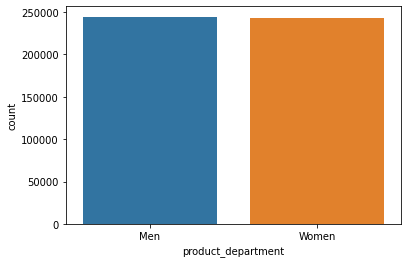

In [ ]:
#melihatmelihat total produk berdasarkan gender
sns.countplot(x=df['product_department'])
plt.show()

In [ ]:
#untuk melihat total produk berdasarkan gender
print(df['product_department'].value_counts()) 

Men      244421
Women    242973
Name: product_department, dtype: int64


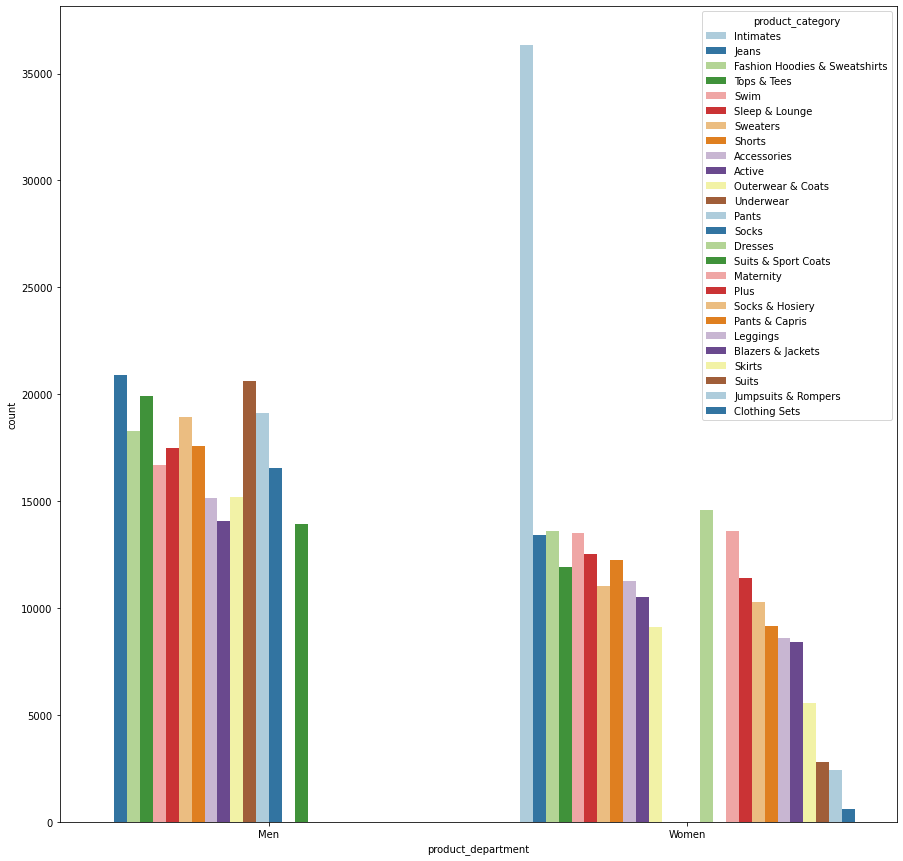

In [ ]:
df_ladies_mens = df[df.product_department.isin(["Women", "Men"])
]
plot_count(
    hue="product_category",
    x="product_department",
    data=df_ladies_mens,
    palette="Paired",
    figsize=(15, 15),
    hue_order=df.product_category.value_counts().index
)

> **Insights:**

Dari visualisasi di atas:
* 5 kategori teratas untuk kelompok pakaian `Men` adalah:
    * `Jeans`
    * `Underware`
    * `Tops & Tees`
    * `Sweaters`
    * `Fashion Hoodies & Sweatshirts`
* 5 kategori teratas untuk kelompok pakaian `Women` adalah:
    * `Intimates`
    * `Dresses`
    * `Matemity`
    * `Fashion Hoodies & Sweatshirts`
    * `Swim`

#### product name

In [ ]:
print(sum(df['product_name'].value_counts()))

487359


In [ ]:
#untuk melihat total produk berdasarkan masing-masing nama
print(df['product_name'].value_counts())

Wrangler Men's Premium Performance Cowboy Cut Jean                                147
7 For All Mankind Men's Standard Classic Straight Leg Jean                        144
Wrangler Men's Rugged Wear Classic Fit Jean                                        98
Thorlo Unisex Experia Running Sock                                                 95
Puma Men's Socks                                                                   91
                                                                                 ... 
WICKING BUTTON FRONT NIGHTSHIRT                                                     2
A Pea in the Pod: Long Sleeve Henley Collar Decorative Trim Nursing Pajama Set      2
Danskin Women's Zig-Zag Vest                                                        2
Mod-O-Doc Women's Slub Jersey Zip Hoodie                                            2
Cosabella Women's Soire Lr Hotpant                                                  2
Name: product_name, Length: 27247, dtype: int64


In [ ]:
#untuk melihat 10 produk tertinggi  berdasarkan nama
print(df['product_name'].value_counts().nlargest(10))

Wrangler Men's Premium Performance Cowboy Cut Jean            147
7 For All Mankind Men's Standard Classic Straight Leg Jean    144
Wrangler Men's Rugged Wear Classic Fit Jean                    98
Thorlo Unisex Experia Running Sock                             95
Puma Men's Socks                                               91
HUGO BOSS Men's Long Pant                                      91
True Religion Men's Ricky Straight Jean                        87
Chaps Big and Tall Solid V-Neck Vest                           80
FULL TILT Basic Womens Hoodie                                  80
Pearl iZUMi Attack Sock 3-Pack                                 79
Name: product_name, dtype: int64


In [ ]:
#untuk melihat 10 produk terendah  berdasarkan nama
print(df['product_name'].value_counts().nsmallest(10))

Miraclesuit Happy Place Women's Plus Swimsuit 82049W           2
Chelsea Studio Plus Size Pants slimming                        2
Frederick's of Hollywood Smocked Mesh Bolero Bra Womens        2
Hanro Women's Pure Affair Chemise                              2
Hue Sleepwear Women's Snowman Pant                             2
PEZ D'OR Women's Maternity Love Boat                           2
Anne Klein Women's 2-Pack Fair Isle Cashmere Gift Set Socks    2
Bump Set Spike Hoodie                                          2
French Connection Women's Fast Metal SSS Short                 2
Wallflower Metallic 5 Pocket Skinnies                          2
Name: product_name, dtype: int64


#### Product Brand

In [ ]:
print(sum(df['product_brand'].value_counts()))

487020


In [ ]:
#untuk melihat total produk berdasarkan brand produk
print(df['product_brand'].value_counts())

Allegra K          16392
Calvin Klein        8607
Carhartt            6819
Hanes               5227
Volcom              5164
                   ...  
Wayfayrer              3
Boob                   2
funzee                 2
Lilac Maternity        2
Empress Silk           2
Name: product_brand, Length: 2754, dtype: int64


In [ ]:
#untuk melihat 10 produk tertinggi  berdasarkan brand
print(df['product_brand'].value_counts().nlargest(10))

Allegra K         16392
Calvin Klein       8607
Carhartt           6819
Hanes              5227
Volcom             5164
Quiksilver         4914
Nautica            4780
Tommy Hilfiger     4675
Levi's             4299
Columbia           4161
Name: product_brand, dtype: int64


In [ ]:
#untuk melihat 10 produk terendah  berdasarkan brand produk
print(df['product_name'].value_counts().nsmallest(10))

Miraclesuit Happy Place Women's Plus Swimsuit 82049W           2
Chelsea Studio Plus Size Pants slimming                        2
Frederick's of Hollywood Smocked Mesh Bolero Bra Womens        2
Hanro Women's Pure Affair Chemise                              2
Hue Sleepwear Women's Snowman Pant                             2
PEZ D'OR Women's Maternity Love Boat                           2
Anne Klein Women's 2-Pack Fair Isle Cashmere Gift Set Socks    2
Bump Set Spike Hoodie                                          2
French Connection Women's Fast Metal SSS Short                 2
Wallflower Metallic 5 Pocket Skinnies                          2
Name: product_name, dtype: int64


#### Country

Text(0.5, 1.0, 'barang tersimpan')

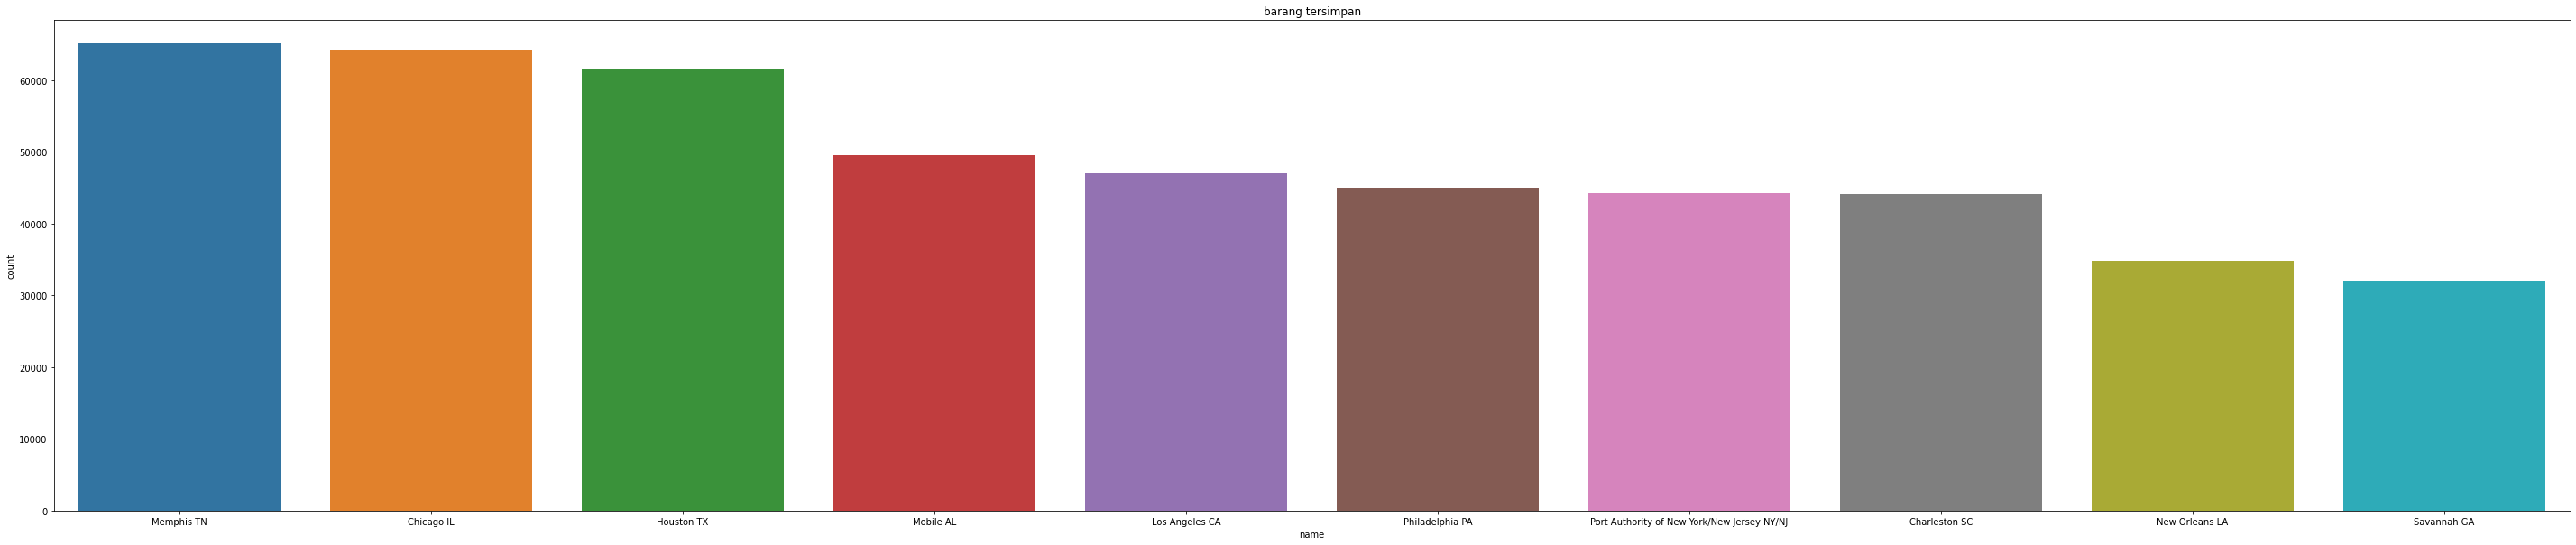

In [ ]:
plot_count(x='name', data=df)
plt.title ('barang tersimpan')

In [ ]:
#untuk melihat total produk untuk masing-masing country
print(df['name'].value_counts()) 

Memphis TN                                     65104
Chicago IL                                     64185
Houston TX                                     61463
Mobile AL                                      49473
Los Angeles CA                                 46996
Philadelphia PA                                44971
Port Authority of New York/New Jersey NY/NJ    44238
Charleston SC                                  44076
New Orleans LA                                 34860
Savannah GA                                    32028
Name: name, dtype: int64


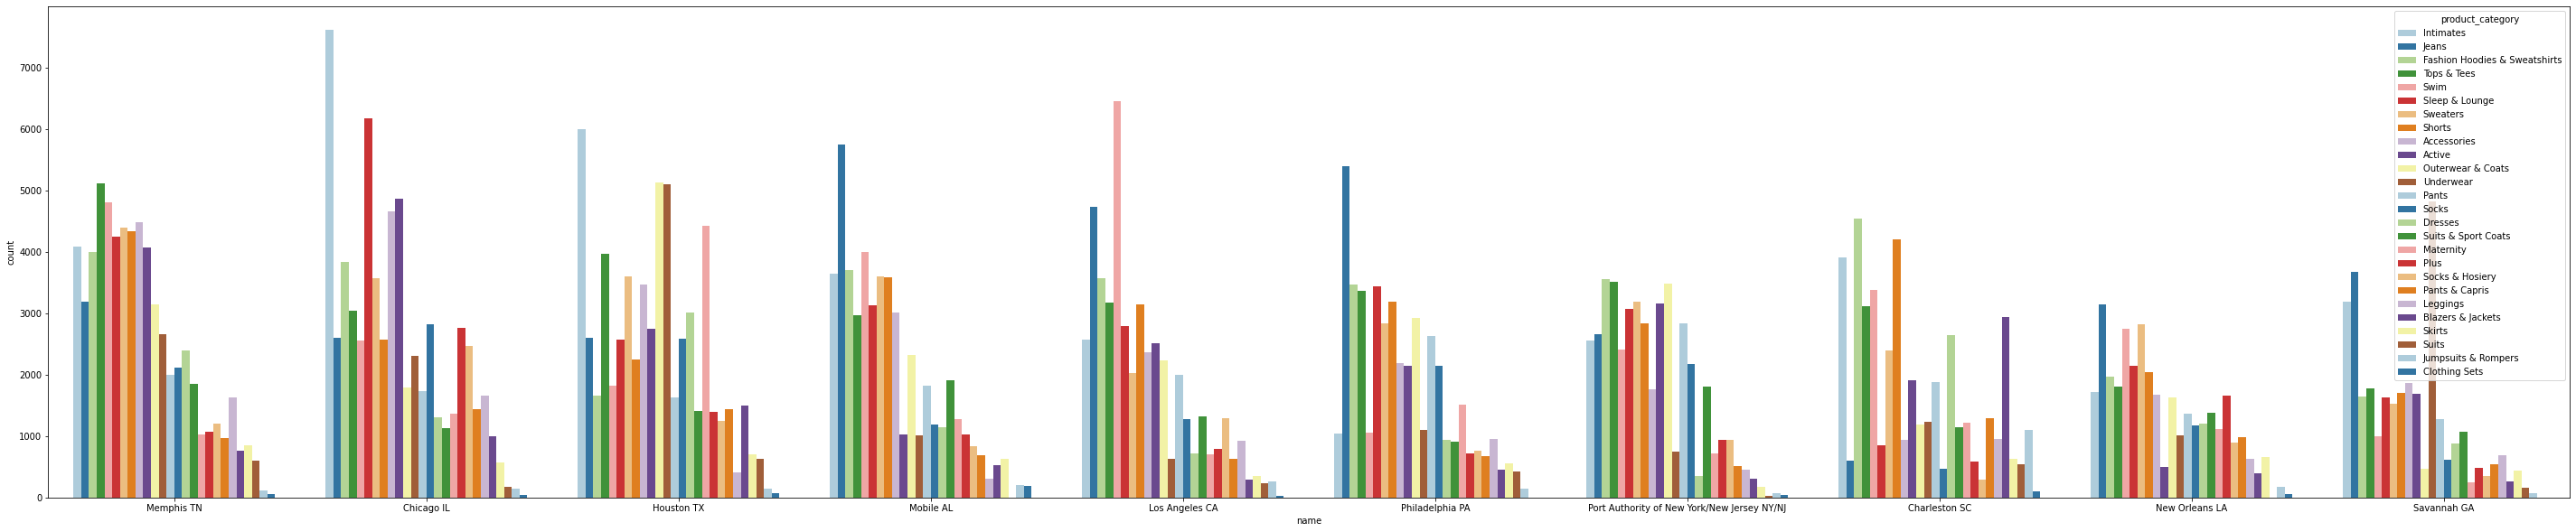

In [ ]:
df_product_country = df[df.name.isin(["Memphis TN", "Chicago IL", "Houston TX", 
                                              "Mobile AL", "Los Angeles CA", "Philadelphia PA", 
                                              "Port Authority of New York/New Jersey NY/NJ", 
                                              "Charleston SC", "New Orleans LA", "Savannah GA"])
]
plot_count(
    hue="product_category",
    x="name",
    data=df_product_country,
    palette="Paired",
    figsize=(50, 10),
    hue_order=df.product_category.value_counts().index
)

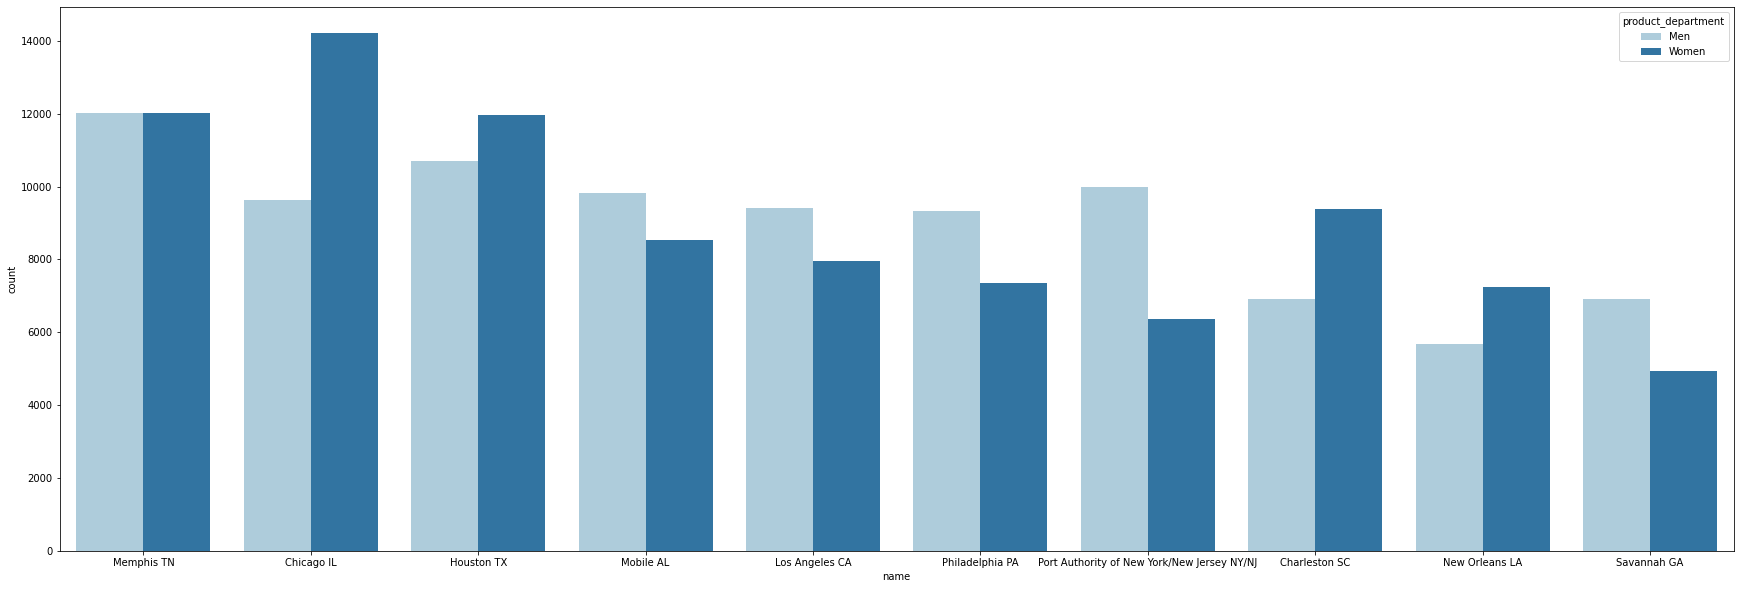

In [ ]:
#untuk melihat banyak produk berdasar gendernya di setiap negara
df_product_gender = df[df.name.isin(["Memphis TN", "Chicago IL", "Houston TX", 
                                              "Mobile AL", "Los Angeles CA", "Philadelphia PA", 
                                              "Port Authority of New York/New Jersey NY/NJ", 
                                              "Charleston SC", "New Orleans LA", "Savannah GA"])
]
plot_count(
    hue="product_department",
    x="name",
    data=df_product_gender,
    palette="Paired",
    figsize=(30, 10),
    hue_order=df.product_department.value_counts().index
)

#### kota dengan biaya cost produk tertinggi dan terendah

In [ ]:
df.groupby(['name']).sum()

,cost,product_retail_price
name,,
Charleston SC,8.579893e+05,1.731591e+06
Chicago IL,1.722227e+06,3.616472e+06
Houston TX,2.002389e+06,4.276146e+06
Los Angeles CA,1.248588e+06,2.577770e+06
Memphis TN,1.793962e+06,3.767672e+06
Mobile AL,1.642398e+06,3.364798e+06
New Orleans LA,1.026630e+06,2.182766e+06
Philadelphia PA,1.426878e+06,2.913092e+06
Port Authority of New York/New Jersey NY/NJ,1.232681e+06,2.557578e+06


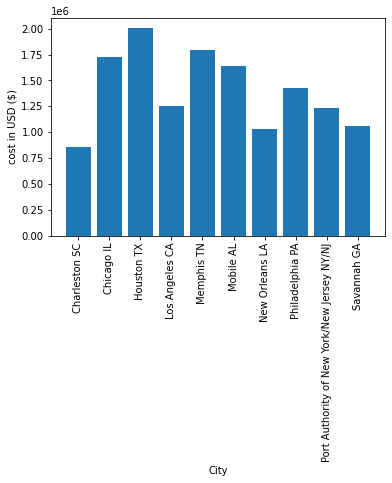

In [ ]:
keys = [city for city, df in df.groupby(['name'])]
plt.bar(keys,df.groupby(['name']).sum()['cost'])
plt.ylabel('cost in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

> Insight

Berdasarkan visualisasi data di atas, maka dapat disimpulkan bahwa biaya cost produk tertinggi berada di kota Houston TX . Sedangkan biaya cost terndah berada di kota Charleston SC.

#### Time created_at

In [ ]:
num_id = df.id.nunique()
num_created = df.created_at.count()

print("Number of unique id:", num_id)
print("Number of sold items:", num_created)

Number of unique id: 487394
Number of sold items: 487394


> **Insights:**

Dari informasi di atas, sebanyak **487394** barang tersedia dari 2018-2022 dengan total **487394** produk masuk.

In [ ]:
df_by_day_masuk = df.groupby("created_at")
df_by_year_masuk = df.groupby(df.created_at.dt.year)
df_by_category = df.groupby("product_category")
df_by_country = df.groupby("name")

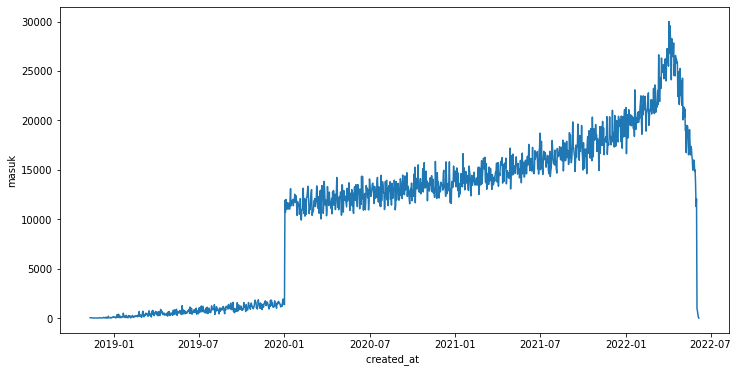

In [ ]:
masuk = df_by_day_masuk.agg(masuk=pd.NamedAgg(column="cost", aggfunc="sum")).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="created_at", y="masuk", data=masuk)
plt.xlabel("created_at ")
plt.ylabel("masuk")
plt.show()

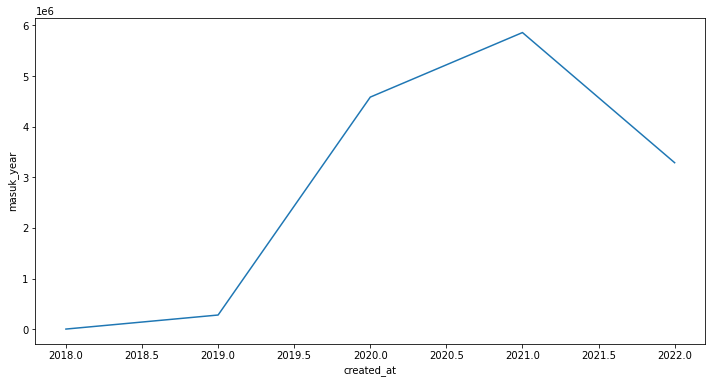

In [ ]:
masuk_year = df_by_year_masuk.agg(masuk_year=pd.NamedAgg(column="cost", aggfunc="sum")).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=masuk_year["created_at"], y="masuk_year", data=masuk_year)
plt.xlabel("created_at")
plt.ylabel("masuk_year")
plt.show()

#### Time Sold_at

In [ ]:
num_id_jual= df.id.nunique()
num_created_jual = df.sold_at.count()

print("Number of unique id:", num_id_jual)
print("Number of sold items:", num_created_jual)

Number of unique id: 487394
Number of sold items: 180508


> **Insights:**

Dari informasi di atas, sebanyak **487394** barang tersedia dari 2018-2022 dengan total **180508** produk terjual.

In [ ]:
df_by_day = df.groupby("sold_at")
df_by_year = df.groupby(df.sold_at.dt.year)
df_by_category = df.groupby("product_category")
df_by_country = df.groupby("name")

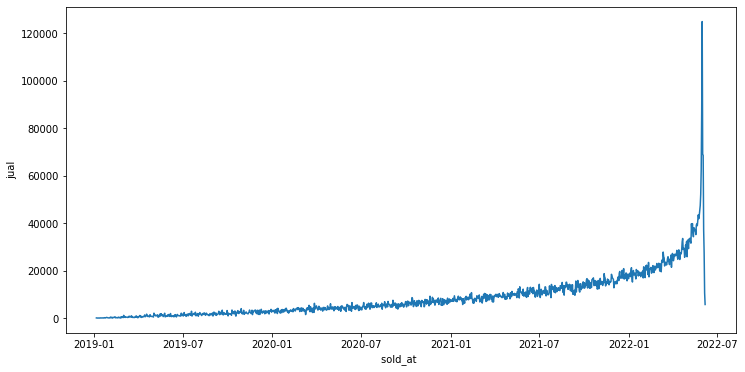

In [ ]:
jual = df_by_day.agg(jual=pd.NamedAgg(column="product_retail_price", aggfunc="sum")).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="sold_at", y="jual", data=jual)
plt.xlabel("sold_at ")
plt.ylabel("jual")
plt.show()

## Data Cleaning

In [ ]:
#menghilangkan seluruh missing value
df=df.dropna()
print("Jumlah data setelah menghapus missing value:", len(df))

Jumlah data setelah menghapus missing value: 180353


In [ ]:
print(df.isnull().sum())

id                                0
product_distribution_center_id    0
product_id                        0
created_at                        0
sold_at                           0
cost                              0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
name                              0
latitude                          0
longitude                         0
dtype: int64


In [ ]:
df

,id,product_distribution_center_id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,name,latitude,longitude
0,1,3,16783,2019-05-23,2019-07-20,28.325000,Tops & Tees,Calvin Klein Sportswear Men's Slim Fit Longsle...,Calvin Klein,55.000000,Men,Houston TX,29.7604,-95.3698
2,3,8,21357,2019-06-10,2019-07-21,35.095548,Jeans,RVCA Spanky II Denim Pant - Men's,RVCA,68.949997,Men,Mobile AL,30.6944,-88.0431
5,6,1,26458,2019-06-08,2019-07-20,5.515400,Underwear,Men's Assorted Plaid Printed 3 Pack Boxer Shorts,Venom,11.990000,Men,Memphis TN,35.1174,-89.9711
9,10,5,27726,2019-07-05,2019-07-19,28.294341,Swim,Coolibar UPF 50+ Men's Short-Sleeve Quarter Zi...,Coolibar,49.990002,Men,New Orleans LA,29.95,-90.0667
13,14,2,27061,2021-11-22,2021-11-30,17.430000,Sleep & Lounge,Majestic International Men's Grahams Cotton Lo...,Majestic International,42.000000,Men,Chicago IL,41.8369,-87.6847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487381,487382,1,15264,2020-06-01,2020-07-02,4.450050,Plus,Wayfarer PL701 Dark Polarized Retro Sunglasses...,Elements of Style,8.990000,Women,Memphis TN,35.1174,-89.9711
487384,487385,3,5583,2021-12-11,2022-02-01,24.200000,Pants & Capris,Flying Tomato Bohemian Pants,Flying Tomato,44.000000,Women,Houston TX,29.7604,-95.3698
487386,487387,4,17518,2022-03-24,2022-05-10,42.975000,Fashion Hoodies & Sweatshirts,Dc Men's Blackheart Zh Hoodie,DC,75.000000,Men,Los Angeles CA,34.05,-118.25
487388,487389,3,20796,2022-05-12,2022-05-26,38.144549,Jeans,Cinch White Label Jeans for Men Relaxed Fit Li...,Cinch,69.989998,Men,Houston TX,29.7604,-95.3698


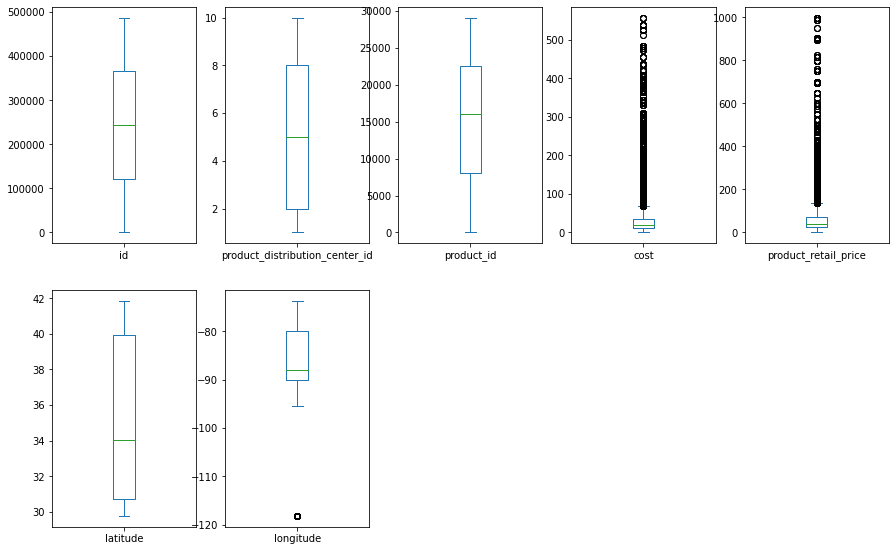

In [ ]:
#melihat outlier masing-masing 
df.plot(kind='box', subplots = True, layout = (4,5), figsize = (15,20))
plt.show()

#### Produk yang paling sering dibeli secara bersamaan

In [ ]:
df1 = df[df['sold_at'].duplicated(keep=False)]
df1['Grouped'] = df1.groupby('sold_at')['product_category'].transform(lambda x: ','.join(x))
df2 = df1[['sold_at', 'Grouped']].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180344 entries, 0 to 487390
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              180344 non-null  object        
 1   product_distribution_center_id  180344 non-null  object        
 2   product_id                      180344 non-null  object        
 3   created_at                      180344 non-null  datetime64[ns]
 4   sold_at                         180344 non-null  datetime64[ns]
 5   cost                            180344 non-null  float64       
 6   product_category                180344 non-null  object        
 7   product_name                    180344 non-null  object        
 8   product_brand                   180344 non-null  object        
 9   product_retail_price            180344 non-null  float64       
 10  product_department              180344 non-null  object 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 369355
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   sold_at  1228 non-null   datetime64[ns]
 1   Grouped  1228 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 28.8+ KB


In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key,value in count.most_common(10):
    print(key, value)

('Intimates', 'Intimates') 158661
('Intimates', 'Jeans') 148474
('Jeans', 'Intimates') 146718
('Fashion Hoodies & Sweatshirts', 'Intimates') 140722
('Intimates', 'Fashion Hoodies & Sweatshirts') 139473
('Tops & Tees', 'Intimates') 139382
('Intimates', 'Tops & Tees') 138428
('Jeans', 'Jeans') 138203
('Sweaters', 'Intimates') 134367
('Fashion Hoodies & Sweatshirts', 'Jeans') 132389


> Insight

Berdasarkan data di atas, maka didapatkan 10 kombinasi produk yang paling sering dibeli secara bersamaan dan diurutkan dari jumlah produk dengan transaksi yang paling banyak ke jumlah produk dengan transaksi yang paling sedikit.

# Modelling

modelling yang akan saya gunakan adalah time series. saya ingin memprediksi berapa barang yang akan terjual ke depannya. Maka saya perlu memilih beberapa data untuk digunakan dalam forcasting.

In [7]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# Memanggil data 
data=pd.read_csv('https://docs.google.com/uc?export=download&id=1c7g3iwaD_x0brR-CgUGXDu30uqhJwdHE')

# Melihat jumlah baris dan kolom
data.shape

#menampilkan data
data

,daily_date,count
0,2019-01-05,1
1,2019-01-08,1
2,2019-01-10,1
3,2019-01-12,1
4,2019-01-13,3
...,...,...
1232,2022-06-02,1160
1233,2022-06-03,633
1234,2022-06-04,455
1235,2022-06-05,194


In [9]:
# Menampilkan nama kolom 
data.columns 

Index(['daily_date', 'count'], dtype='object')

In [10]:
# Menampilkan info dari tiap variable
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   daily_date  1237 non-null   object
 1   count       1237 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.5+ KB


> Dapat dilihat tipe data pada 'daily_date' masih berupa object, sehingga perlu diubah menjadi tipe data datetime menggunakan function pandas yaitu `to_datetime() `

In [11]:
# Pada kolom 'daily_date', ubah tipe data menjadi datetime
data['daily_date']=pd.to_datetime(data['daily_date'], infer_datetime_format=True)

# Cek tipe data 
print (data.dtypes)

daily_date    datetime64[ns]
count                  int64
dtype: object


> Ketika *dealing* dengan data time series, dianjurkan untuk menggunakan kolom yang mengandung 'date' sebagai index dari dataframe.

In [12]:
# Set kolom 'daily_date' sebagai index
data=data.set_index(['daily_date'])
data.head()

,count
daily_date,
2019-01-05,1
2019-01-08,1
2019-01-10,1
2019-01-12,1
2019-01-13,3


In [13]:
# Summary statistics pada variabel 'count'
print (data.describe().T)
print ('---------')

# Pembulatan decimal 2 angka di belakang koma
print(data.describe().T.round(2))

        count       mean         std  min   25%   50%    75%     max
count  1237.0  145.92401  158.273515  1.0  41.0  98.0  199.0  2042.0
---------
        count    mean     std  min   25%   50%    75%     max
count  1237.0  145.92  158.27  1.0  41.0  98.0  199.0  2042.0


In [14]:
#mengambil data dari 27 Mei 2020 sampai 27 Mei 2022
data2=data['2021-05-27':'2022-05-27']
data2

,count
daily_date,
2021-05-27,160
2021-05-28,163
2021-05-29,194
2021-05-30,169
2021-05-31,157
...,...
2022-05-23,715
2022-05-24,706
2022-05-25,780


In [15]:
data2.describe()

,count
count,366.000000
mean,304.081967
std,124.538925
min,145.000000
25%,213.000000
50%,269.000000
75%,357.500000
max,789.000000


In [16]:
#menampilkan nilai rata-rata pada tiap akhir tahun
data2.resample(rule='A').mean()

,count
daily_date,
2021-12-31,225.13242
2022-12-31,421.70068


## Data Analysis

* Untuk memulai data analysis, kita perlu mengeksplor data terlebih dahulu melalui visualisasi ke dalam bentuk grafik (Time series plot).

* Tujuan dari time Series plot untuk memudahkan kita menemukan pattern atau pola dan temuan yang tidak biasa (unusual observations) dari dataset.

### Time Series Plot

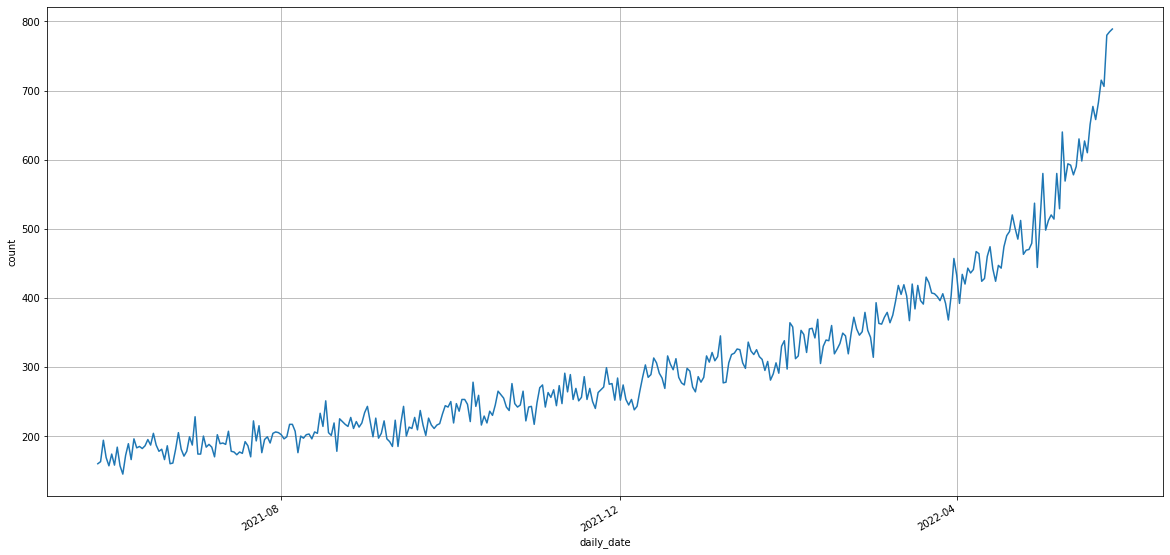

In [17]:
# Time Series plot

import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("daily_date")
plty.ylabel("count")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data2)
fig.autofmt_xdate()
plty.grid()
plty.show()


> **Insights:**

* Dari grafik di atas, kita dapat melihat bahwa dari data jumlah penjualan produk memiliki  pola  tren yang menaik selama kurun waktu lebih dari 2 tahun (Mei 2021 s/d Mei 2022). 


---

* Selanjutnya


kita dapat cek secara visual (menggunakan rolling mean & std) dan melakukan uji statistik (statistical test) dengan Dickey-Fuller tes untuk melakukan konfirmasi apakah data yang dimiliki merepresentasikan bentuk stasioner. 

### Stationarity Check - Rolling Statistic test

* Rolling ini sangat berguna pada data time series. Secara konsep, rolling artinya membuat rolling window dengan ukuran yang spesifik dan akan melakukan kalkulasi pada data dalam window tsb, yang kemudian akan bergeser terus kebawah seperti yang ditunjukkan pada gambar di bawah.


In [18]:
# rolling dengan interval window sebesar 12 bulan dan hitung rata-rata
rolmean=data2.rolling(window=12).mean()  

# rolling dengan interval window sebesar 12 bulan dan hitung st. deviasi
rolstd=data2.rolling(window=12).std() 

# Tampilkan 15 baris pertama dari hasil rolling mean
print('15 baris pertama rolling mean: ')
print(rolmean.head(15))                
print ('')

# Tampilkan 15 baris pertama dari hasil rolling st. deviasi
print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))            

15 baris pertama rolling mean: 
                 count
daily_date            
2021-05-27         NaN
2021-05-28         NaN
2021-05-29         NaN
2021-05-30         NaN
2021-05-31         NaN
2021-06-01         NaN
2021-06-02         NaN
2021-06-03         NaN
2021-06-04         NaN
2021-06-05         NaN
2021-06-06         NaN
2021-06-07  168.500000
2021-06-08  169.000000
2021-06-09  171.750000
2021-06-10  170.833333

15 baris pertama std. deviasi: 
                count
daily_date           
2021-05-27        NaN
2021-05-28        NaN
2021-05-29        NaN
2021-05-30        NaN
2021-05-31        NaN
2021-06-01        NaN
2021-06-02        NaN
2021-06-03        NaN
2021-06-04        NaN
2021-06-05        NaN
2021-06-06        NaN
2021-06-07  14.718572
2021-06-08  14.503918
2021-06-09  16.282311
2021-06-10  15.188712


> Lalu, kita akan visualisasikan dari hasil rolling mean dan rolling std. deviasi untuk mengecek apakah apakah series ini stasioner atau tidak melalui bentuk visual grafik di bawah.

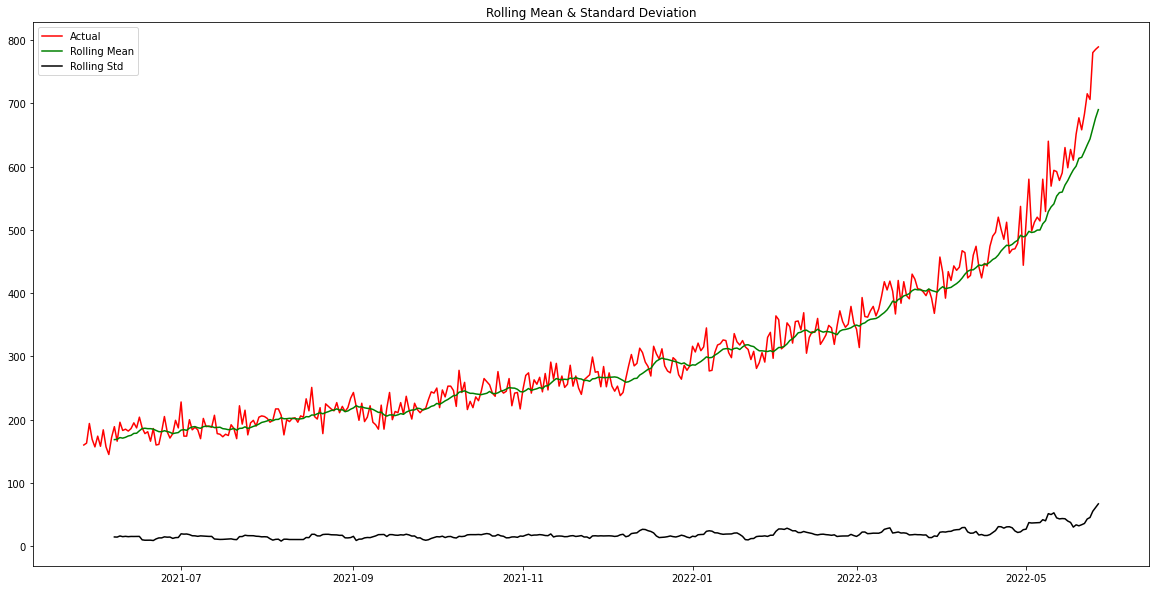

In [19]:
# atur ukuran chart
plt.figure(figsize=(20,10))

# buat multiple line chart berdasarkan warna dan label
actual=plt.plot(data2, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

> **Insights:**

Dari grafik di atas kita dapat melihat bahwa data aktual dan rolling (mean dan std) memiliki bentuk yang cukup berbeda, menandakan bahwa **series** ini **tidak stasioner**.

###  Stationarity Check - Augmented Dickey-Fuller (ADF) test

* Selanjutnya, kita akan gunakan ADF test untuk uji stasioner dimana: 

  **H0:** *The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.*

 **H1:** *The time series is stationary.*

* Jika p-value test kurang dari significance level (contoh alpha = 0.05) dan nilai ADF test lebih kecil dibandingkan critical values maka kita dapat reject null hypothesis dan dapat menyimpulkan bahwa time series adalah stasioner.

In [20]:
# menggunakan function adfuller() yang diterapkan pada variable 'count'
dftest=adfuller(data2['count'], autolag='AIC')
# Supaya hasil uji lebih nyaman dibaca, maka kita buat series berdasarkan index 
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

# Gunakan for loop untuk menaruh value dari dictionary dengan function items()
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            5.199690
p-value                   1.000000
Lags Used                12.000000
No. of Obs              353.000000
Critical Value (1%)      -3.449011
Critical Value (5%)      -2.869763
Critical Value (10%)     -2.571151
dtype: float64


> **Insights:**

Nilai ADF statistic yang jauh lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, **kita gagal menolak null hypothesis pada 90%, 95%, dan 99% tingkat keyakinan**, yang **mengindikasikan** bahwa **data time series ini strongly non-stationary.**

* Berdasarkan insights di atas, maka kita akan mencoba menstabilkan variance dengan cara log transformation pada data  dengan ``` np.log() ```



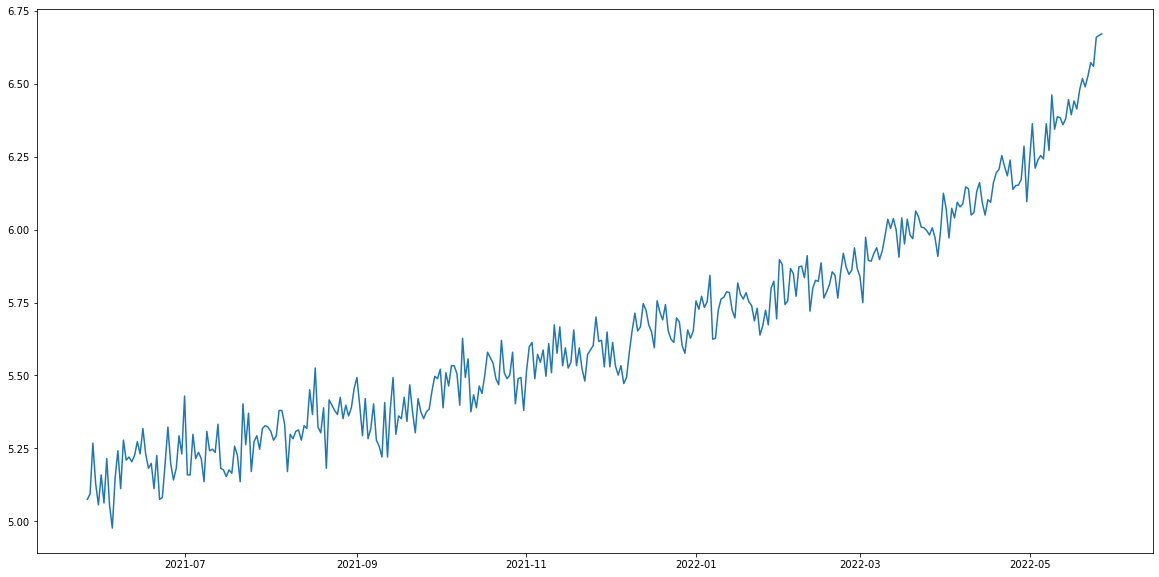

In [21]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(20,10))
data_log=np.log(data2) 
plt.plot(data_log)

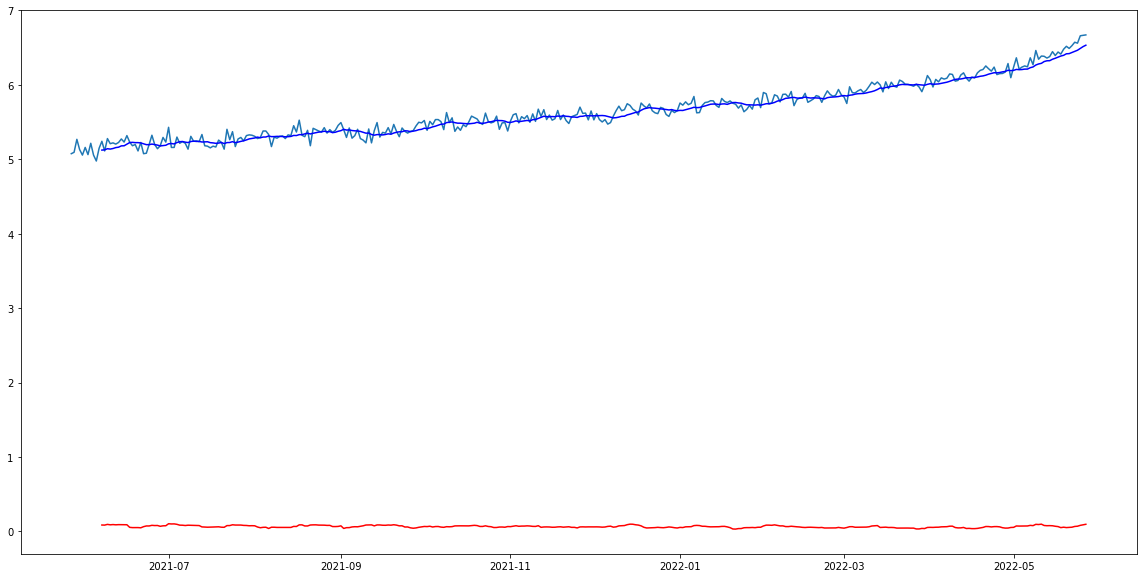

In [22]:
# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=12).mean() 
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue')
plt.plot(MStd, color='red')

* STASIONER TERHADAP RATA-RATA
---

In [23]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg

# Tampilkan 12 baris teratas dari data_log_diff
data_log_diff.head(12)

,count
daily_date,
2021-05-27,NaN
2021-05-28,NaN
2021-05-29,NaN
2021-05-30,NaN
2021-05-31,NaN
2021-06-01,NaN
2021-06-02,NaN
2021-06-03,NaN
2021-06-04,NaN


In [24]:
# Efek dari rolling di atas, maka akan ada value NaN, sehingga kita bisa lakukan dropna()
data_log_diff=data_log_diff.dropna() 
data_log_diff

,count
daily_date,
2021-06-07,0.118269
2021-06-08,-0.014558
2021-06-09,0.136205
2021-06-10,0.072441
2021-06-11,0.075773
...,...
2022-05-23,0.122192
2022-05-24,0.094849
2022-05-25,0.169551


In [25]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller

def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['count'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

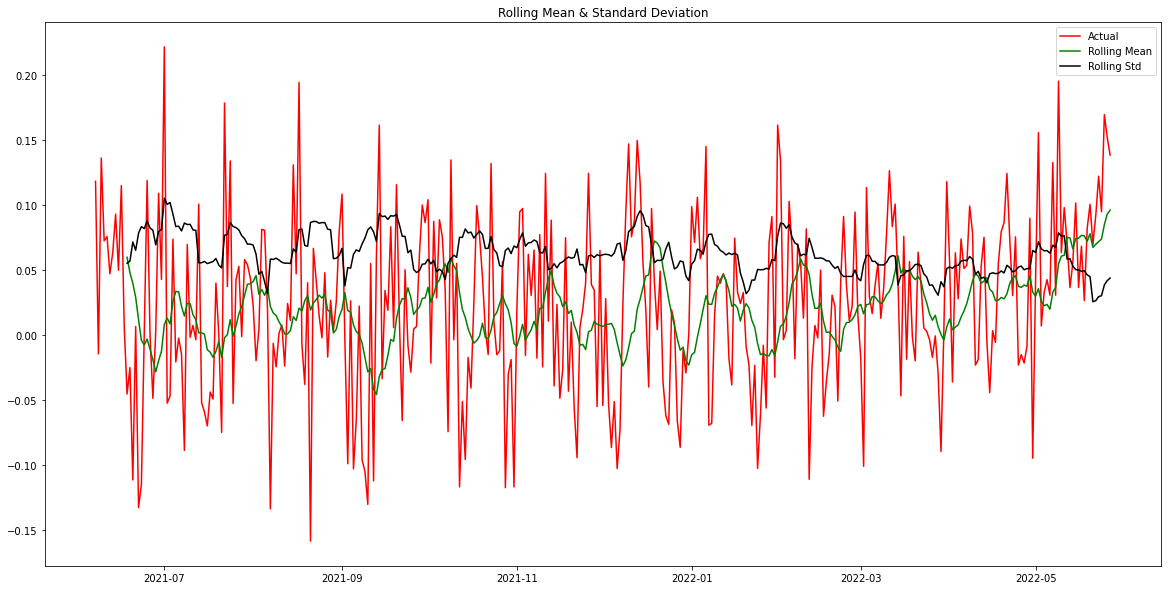

Dickey-Fuller Test: 
Test Statistic         -9.515649e+00
p-value                 3.162537e-16
Lags Used               1.000000e+00
No. of Obs              3.530000e+02
Critical Value (1%)    -3.449011e+00
Critical Value (5%)    -2.869763e+00
Critical Value (10%)   -2.571151e+00
dtype: float64


In [ ]:
# panggil function dan terapkan pada data_log_diff
stationarity(data_log_diff)

> **Insights:**

* Dapat dilihat dari hasil Dickey-Fuller test ini, bahwa untuk tingkat keyakinan 5% dan 10% sudah menunjukkan series ini stasioner dimana p-value 5.284291E-16 < 0.05 menunjukkan bahwa kita menolak null hypothesis (reject to fail H0, accept H1), dan menyatakan bahwa series ini stasioner.

* Karena `t-value (-9.427943) < DF critical value 1% (-3.439607)` maka menolak null hypothesis (H0) yang menyatakan pada series ini  stasioner pd tingkat keyakinan 1% (*significance level* of 0.01). 

### Stationarity Check - Shift test

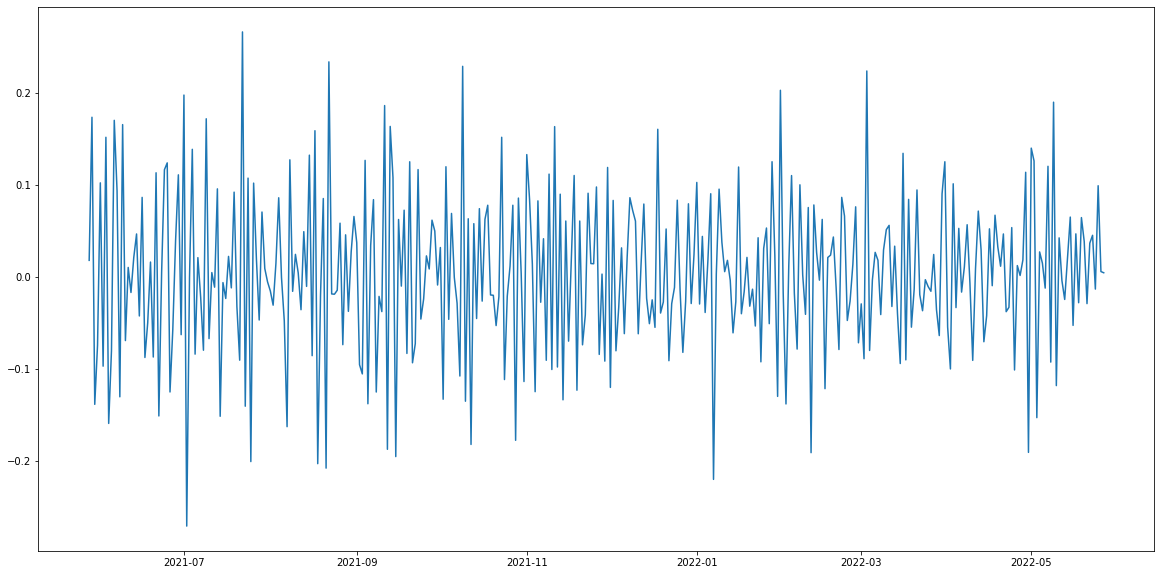

In [26]:
# Buat format ukuran chart
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
data_shift=data_log-data_log.shift() 

# Tampilkan chart
plt.plot(data_shift)

In [27]:
# Check missing value
data_shift.isna().sum()

count    1
dtype: int64

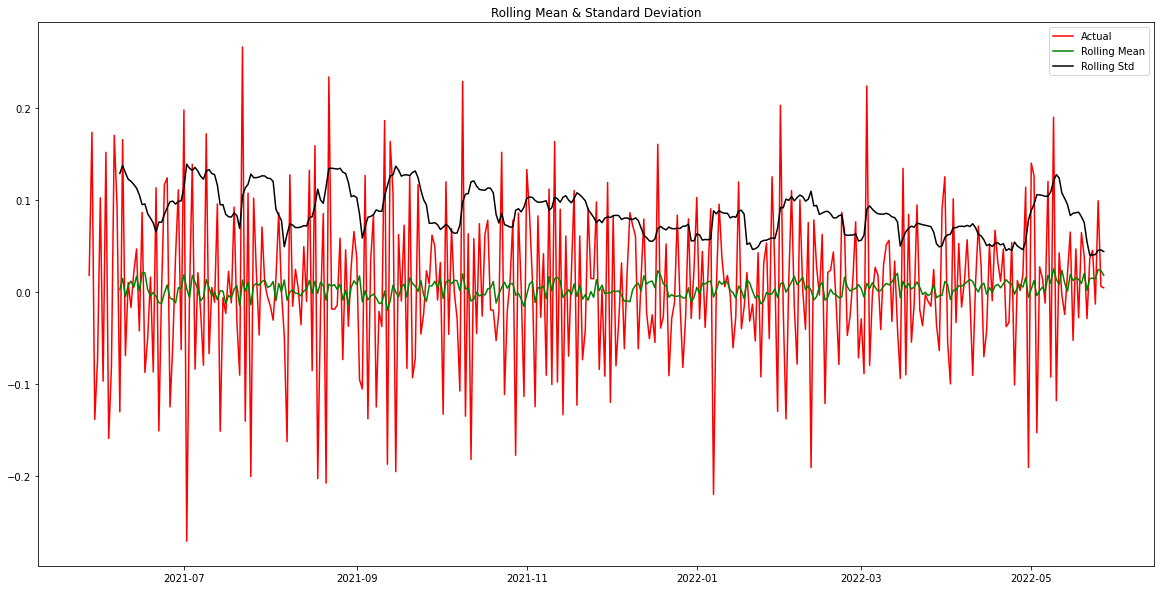

Dickey-Fuller Test: 
Test Statistic         -8.058452e+00
p-value                 1.667832e-12
Lags Used               1.100000e+01
No. of Obs              3.530000e+02
Critical Value (1%)    -3.449011e+00
Critical Value (5%)    -2.869763e+00
Critical Value (10%)   -2.571151e+00
dtype: float64


In [28]:
# Lakukan dropna 
data_shift=data_shift.dropna()

# Panggil function stationarity dan terapkan pada data_shift yang sudah dibersihkan dari NA value
stationarity(data_shift)

> **Insights:**

* Dari `data_shift` di atas, hasil ADF test menunjukkan bahwa p-value < 0.05 sehingga menerima null hypothesis yang mengindikasikan bahwa series ini  stasioner. 

* Test statistic yang lebih kecil dari Critical value pd 1% dan 5% juga menunjukkan data stasioner. 

###  Decomposition and Autocorrelation Function

* Forecasting menggunakan data historikal dimana diurutkan dengan waktu, sehingga goal dari time series model yaitu untuk menemukan waktu dengan trend, seasonality, dan autocorrelation (correlation over time) lalu diformulasikan menjadi sebuah model.

* Teknik Decomposition ini digunakan untuk split data time series menjadi beberapa komponen yaitu trend, seasonality, dan noise (residual) components. 

* Setiap komponen dapat digunakan untuk menunjukkan pola (pattern) yang ada di dalam tiap kategori agar dapat menentukan apakah model Additive atau Multiplicative.

  * **Seasonality**: describes the periodic signal in your time series.
  * **Trend**: describes whether the time series is decreasing, constant, or increasing over time.
  * **Noise**: describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.


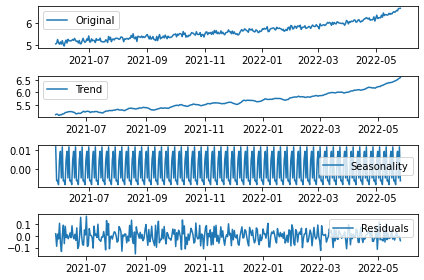

In [ ]:
# panggil function seasonal_decompose () dari statsmodels.tsa yang diterapkan di variabel data_log
decomp=seasonal_decompose(data_log)

# buat variabel trend, seasonal, residual yang sudah diterapkan
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

# Format gambar 
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

> **Insights:**

* Dari proses seasonal decompose, maka akan terbagi 
menjadi grafik original, trend (dalam hal ini dengan pola menaik), Seasonality (pola berulang yang terjadi dari tahun ke tahun), dan residuals (seberapa jauh titik data dari garis regresi).

* Dapat dilihat bahwa trend dari time series penjualan produk adalah semakin menaik, dan seasonality mengikuti pola. 

In [ ]:
# Tampilkan nilai dari tiap kategori dari 24 baris teratas
print("Trend \n",trend.head(24), '\n') # \n untuk menambahkan baris di akhir
print("Seasonal \n",seasonal.head(24), '\n')
print("Residual \n",residual.head(24), '\n')

Trend 
                count
daily_date          
2021-05-27       NaN
2021-05-28       NaN
2021-05-29       NaN
2021-05-30  5.120654
2021-05-31  5.140620
2021-06-01  5.135262
2021-06-02  5.093673
2021-06-03  5.096187
2021-06-04  5.122687
2021-06-05  5.115963
2021-06-06  5.146751
2021-06-07  5.145973
2021-06-08  5.169417
2021-06-09  5.201885
2021-06-10  5.213064
2021-06-11  5.217528
2021-06-12  5.234545
2021-06-13  5.240261
2021-06-14  5.243349
2021-06-15  5.237839
2021-06-16  5.237052
2021-06-17  5.220801
2021-06-18  5.214050
2021-06-19  5.191774 

Seasonal 
                count
daily_date          
2021-05-27  0.011514
2021-05-28 -0.006264
2021-05-29 -0.006026
2021-05-30 -0.008243
2021-05-31  0.004579
2021-06-01  0.009201
2021-06-02 -0.004760
2021-06-03  0.011514
2021-06-04 -0.006264
2021-06-05 -0.006026
2021-06-06 -0.008243
2021-06-07  0.004579
2021-06-08  0.009201
2021-06-09 -0.004760
2021-06-10  0.011514
2021-06-11 -0.006264
2021-06-12 -0.006026
2021-06-13 -0.008243
2021-06-14  0

> **Insights:**

Dari data residual, kita dapat melihat banyak NA value, maka kita lakukan dropna

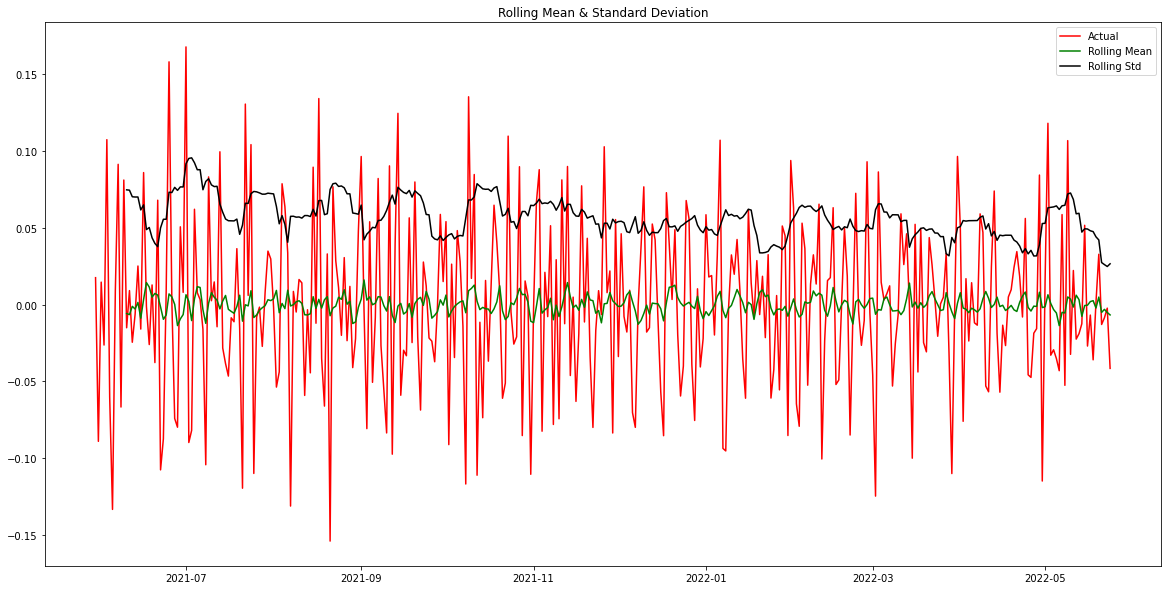

Dickey-Fuller Test: 
Test Statistic         -1.042864e+01
p-value                 1.632509e-18
Lags Used               1.600000e+01
No. of Obs              3.430000e+02
Critical Value (1%)    -3.449560e+00
Critical Value (5%)    -2.870004e+00
Critical Value (10%)   -2.571279e+00
dtype: float64


In [ ]:
# assign variable baru decomp_data dengan variabel residual di atas
decomp_data=residual

# terapkan function dropna
decomp_data=decomp_data.dropna()

# Panggil function stationarity dan terapkan pada decomp data yang tanpa NA value
stationarity(decomp_data)

> **Insights:**

Dari komponen data residual, hasil ADF test menunjukkan bahwa bahwa nilai Test statistic yg jauh lebih kecil daripada critical value pd berbagai tingkat keyakinan. Dan p-value yang jauh lebih kecil dari 0.05, kita dapat menyatakan bahwa series ini cukup kuat stasioner.

**Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)**

* Selanjutnya cara lain untuk melakukan tes stasioner adalah dengan menggunakan ACF dan PACF.

* Masih ingat dengan konsep sederhana Correlation yang sudah kita dipelajari di topik Statistik sebelummnya? Kedua function berdasarkan konsep dari Correlation.

* ACF merupakan korelasi antar data di dalam time series tersebut yang dipisahkan dalam lag dimana  (Xt , Xk+t) dengan k adalah jumlah lag dan t adalah nilainya.

* Sama halnya dengan ACF, PACF juga menghitung korelasi antar data di time series. Perbedaannya, PACF juga menghitung korelasi antara Xt dan Xt+k namun sebelumnya menghilangkan data antara Xt dan Xt+k terlebih dahulu. Berarti data yang dihilangkan adalah data  Xt+1 sampai dengan Xt+k-1



Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

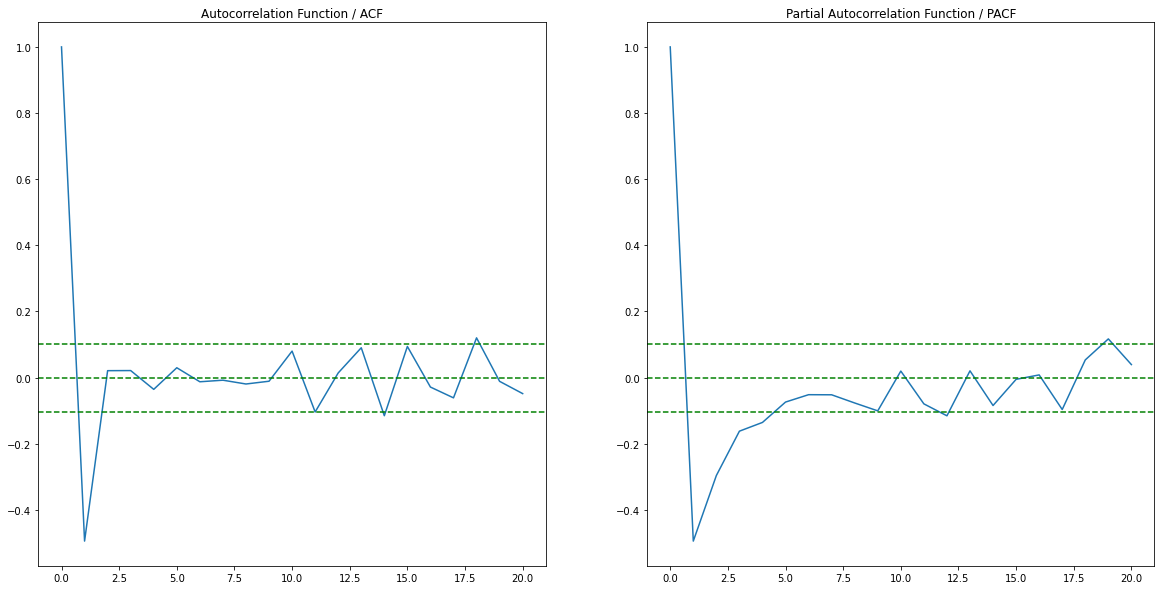

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

> **Interpretation:**

* Fungsi ACF dan PCF membantu kita dengan melakukan plot korelasi antara time series dan lag series tsb dengan 95% tingkat keyakinan ditandai dengan garis hijau putus-putus. 

* Jika nilai autocorrelation memotong/melewati garis putus-putus tersebut dapat diartikan bahwa specific lag tsb berkorelasi secara signifikan dengan time series yang ada. 

* Dari grafik di atas terlihat bahwa grafik time series (berwarna biru) berpotongan dengan grafik shift time series (dlm hal ini dengan lag=2.5) baik pada batas atas maupun bawah, sehingga dapat dikatakan bahwa grafik time series ini mengalami efek auto correlation. 

### Model Development

> Pada Model Development, kita akan mencoba menerapkan 3 model time series yaitu:
1. Simple Exponential Smoothing
2. Holt's Method
3. Holt-Winters



* Pisahkan data time series menjadi train dan test data




In [30]:
# Split the data 
train = data2[0:int(len(data2)*0.80)]   #train data sebesar 80%
test = data2[int(len(data2)*0.80):]     #test data sebesar 20%

In [31]:
print(train)
print(test)

            count
daily_date       
2021-05-27    160
2021-05-28    163
2021-05-29    194
2021-05-30    169
2021-05-31    157
...           ...
2022-03-10    395
2022-03-11    418
2022-03-12    405
2022-03-13    419
2022-03-14    403

[292 rows x 1 columns]
            count
daily_date       
2022-03-15    367
2022-03-16    420
2022-03-17    384
2022-03-18    418
2022-03-19    396
...           ...
2022-05-23    715
2022-05-24    706
2022-05-25    780
2022-05-26    785
2022-05-27    789

[74 rows x 1 columns]


####  **1. SES**

****

* Single Exponential Smoothing merupakan metode peramalan
yang digunakan untuk data stasioner atau data yang relatif stabil. 

In [32]:
fit2 = SimpleExpSmoothing(train).fit()
print(fit2.summary())
fcast2 = fit2.forecast(12).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  292
Model:             SimpleExpSmoothing   SSE                          94374.533
Optimized:                       True   AIC                           1691.256
Trend:                           None   BIC                           1698.609
Seasonal:                        None   AICC                          1691.395
Seasonal Periods:                None   Date:                 Sat, 25 Jun 2022
Box-Cox:                        False   Time:                         15:43:57
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2865042                alpha                 True
initial_level              168.03682                

In [ ]:
data_Holt2 = test.copy() 

In [ ]:
data_Holt2['Holt'] = fit2.forecast(len(test['count']))

In [ ]:
data_Holt2

,count,Holt
daily_date,,
2022-03-15,367,401.23386
2022-03-16,420,401.23386
2022-03-17,384,401.23386
2022-03-18,418,401.23386
2022-03-19,396,401.23386
...,...,...
2022-05-23,715,401.23386
2022-05-24,706,401.23386
2022-05-25,780,401.23386


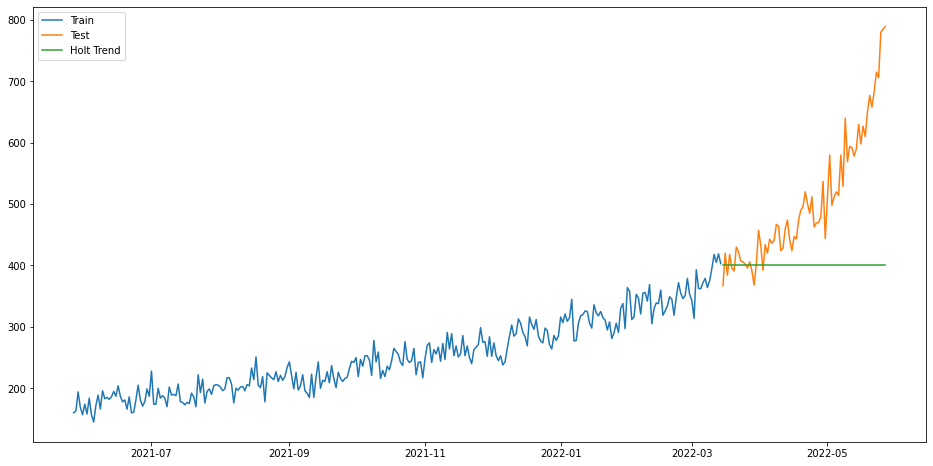

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['count'], label='Train')
plt.plot(test['count'], label='Test')
plt.plot(data_Holt2['Holt'], label='Holt Trend')
plt.legend(loc=0)

#### **2. Holt's Method**

****

* Metode Holt's Method digunakan untuk data yang memiliki trend atau data yang memiliki kecenderungan peningkatan atau penurunan dalam jangka panjang.


In [33]:
fit1 = Holt(train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
print(fit1.summary())
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  292
Model:                           Holt   SSE                         140153.562
Optimized:                      False   AIC                           1810.732
Trend:                       Additive   BIC                           1825.439
Seasonal:                        None   AICC                          1811.027
Seasonal Periods:                None   Date:                 Sat, 25 Jun 2022
Box-Cox:                        False   Time:                         15:44:05
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8000000                alpha                False
smoothing_slope            0.2000000                

In [34]:
data_Holt1 = test.copy() 

In [35]:
data_Holt1['Holt'] = fit1.forecast(len(test['count']))

In [36]:
data_Holt1

,count,Holt
daily_date,,
2022-03-15,367,410.406007
2022-03-16,420,413.495292
2022-03-17,384,416.584577
2022-03-18,418,419.673862
2022-03-19,396,422.763146
...,...,...
2022-05-23,715,623.566664
2022-05-24,706,626.655948
2022-05-25,780,629.745233


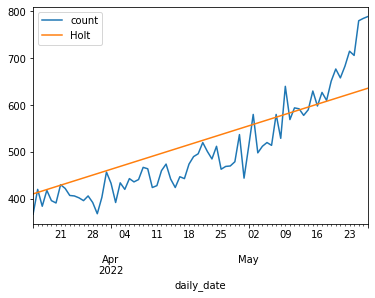

In [ ]:
data_Holt1.plot()

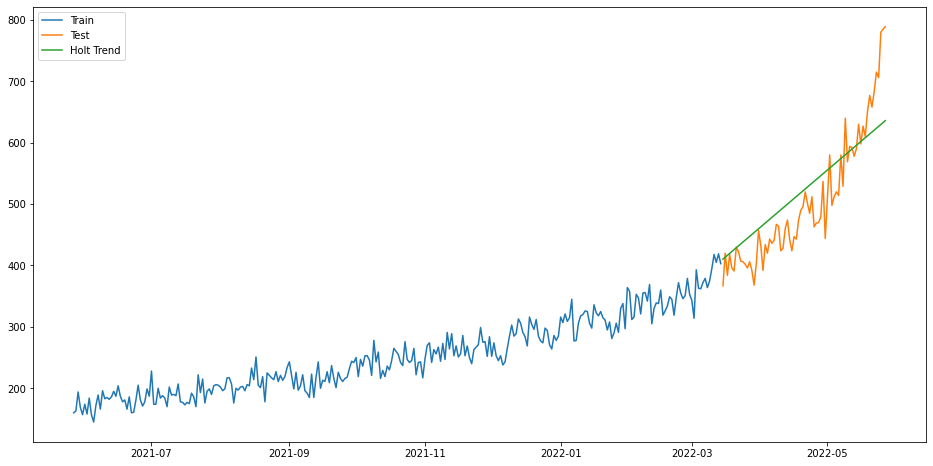

In [37]:
# visualisasi hasil forecast dari model Holt's Method dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['count'], label='Train')
plt.plot(test['count'], label='Test')
plt.plot(data_Holt1['Holt'], label='Holt Trend')
plt.legend(loc=0)

> Forecast untuk tiga bulan selanjutnya 

In [ ]:
model_data1 = Holt(train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

In [ ]:
forecast1=model_data1.forecast(steps=200)
forecast1

2022-03-15     410.406007
2022-03-16     413.495292
2022-03-17     416.584577
2022-03-18     419.673862
2022-03-19     422.763146
                 ...     
2022-09-26    1012.816558
2022-09-27    1015.905843
2022-09-28    1018.995128
2022-09-29    1022.084413
2022-09-30    1025.173698
Freq: D, Length: 200, dtype: float64

In [ ]:
print(forecast1['2022-05-28':'2022-06-28'].round(2))

2022-05-28    639.01
2022-05-29    642.10
2022-05-30    645.19
2022-05-31    648.28
2022-06-01    651.37
2022-06-02    654.46
2022-06-03    657.55
2022-06-04    660.64
2022-06-05    663.73
2022-06-06    666.82
2022-06-07    669.91
2022-06-08    673.00
2022-06-09    676.08
2022-06-10    679.17
2022-06-11    682.26
2022-06-12    685.35
2022-06-13    688.44
2022-06-14    691.53
2022-06-15    694.62
2022-06-16    697.71
2022-06-17    700.80
2022-06-18    703.89
2022-06-19    706.98
2022-06-20    710.07
2022-06-21    713.16
2022-06-22    716.25
2022-06-23    719.33
2022-06-24    722.42
2022-06-25    725.51
2022-06-26    728.60
2022-06-27    731.69
2022-06-28    734.78
Freq: D, dtype: float64


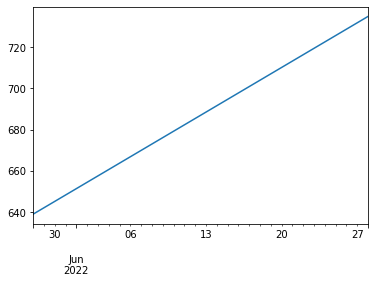

In [ ]:
forecast1['2022-05-28':'2022-06-28'].plot()

#### **3. HoltWinters**

****

* Metode Holt-Winters adalah model dari time series behavior. Forecasting selalu memerlukan model, dan Holt-Winters adalah salah satu cara untuk modeling 3 aspek dari time series, yaitu : nilai rata-rata, slope dan seasonality

In [ ]:
model_data = ExponentialSmoothing(np.asarray(train['count']),seasonal_periods=30, trend='mul',seasonal='mul').fit(optimized=True)

In [ ]:
data_Holt = test.copy() 

In [ ]:
data_Holt['Holt'] = model_data.forecast(len(test['count']))

In [ ]:
data_Holt

,count,Holt
daily_date,,
2022-03-15,367,384.416171
2022-03-16,420,378.618009
2022-03-17,384,393.538319
2022-03-18,418,393.656262
2022-03-19,396,385.644863
...,...,...
2022-05-23,715,503.410604
2022-05-24,706,516.835892
2022-05-25,780,521.040270


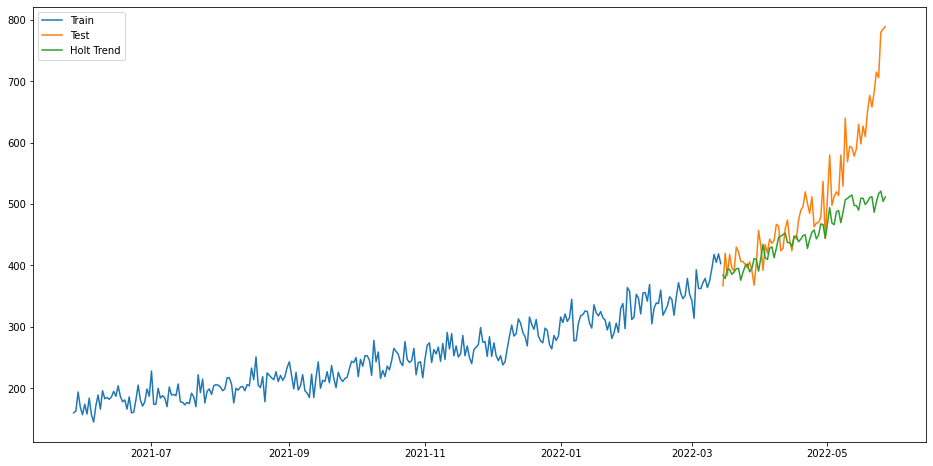

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['count'], label='Train')
plt.plot(test['count'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend')
plt.legend(loc=0)

> **Keterangan:**

* Dari grafik di atas terlihat bahwa model Holt-winters mulai melakukan prediksi pada Maret 2022 hingga Mei 2022 yang ditunjukkan oleh garis berwarna hijau. 

* Garis berwarna biru merupakan data yang digunakan untuk train dan garis berwarna oranye yang digunakan untuk test.

> Forecast untuk tiga bulan selanjutnya 

In [ ]:
model_data = ExponentialSmoothing((train['count']),seasonal_periods=30, trend='mul',seasonal='mul').fit(optimized=True)

In [ ]:
forecast=model_data.forecast(steps=200)
forecast

2022-03-15    384.416171
2022-03-16    378.618009
2022-03-17    393.538319
2022-03-18    393.656262
2022-03-19    385.644863
                 ...    
2022-09-26    889.638221
2022-09-27    847.386855
2022-09-28    892.343666
2022-09-29    942.406150
2022-09-30    894.651672
Freq: D, Length: 200, dtype: float64

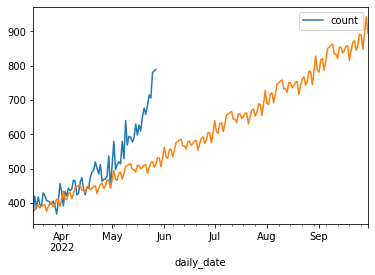

In [ ]:
test.plot()
forecast.plot()

In [ ]:
print(forecast['2022-05-28':'2022-06-28'].round(2))

2022-05-28    532.16
2022-05-29    530.92
2022-05-30    505.71
2022-05-31    532.54
2022-06-01    562.42
2022-06-02    533.92
2022-06-03    530.53
2022-06-04    554.43
2022-06-05    557.07
2022-06-06    534.37
2022-06-07    554.00
2022-06-08    576.85
2022-06-09    579.47
2022-06-10    583.07
2022-06-11    585.75
2022-06-12    566.21
2022-06-13    566.16
2022-06-14    557.62
2022-06-15    579.59
2022-06-16    579.77
2022-06-17    567.97
2022-06-18    573.24
2022-06-19    581.13
2022-06-20    582.39
2022-06-21    553.72
2022-06-22    572.75
2022-06-23    588.03
2022-06-24    592.81
2022-06-25    573.78
2022-06-26    582.17
2022-06-27    605.46
2022-06-28    604.06
Freq: D, dtype: float64


### Metric evaluasi 

#### **1. SES**

In [ ]:
# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['count'] - data_Holt2['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['count'],data_Holt2['Holt']).round(2), ' %')
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Percentage Error of our forecasts is  18.44  %
The Root Mean Squared Error of our forecasts is 147.606


#### **2. Holt's Method**

In [ ]:
# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['count'] - data_Holt1['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['count'],data_Holt1['Holt']).round(2), ' %')
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Percentage Error of our forecasts is  8.93  %
The Root Mean Squared Error of our forecasts is 55.549


#### **3. HoltWinter**

In [ ]:
# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['count'] - data_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['count'],data_Holt['Holt']).round(2), ' %')
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Percentage Error of our forecasts is  10.21  %
The Root Mean Squared Error of our forecasts is 89.347


## Eksport Data

In [ ]:
print("Export to excel..")

df.to_excel("data_clean.xlsx", index=False)
print("Done!")

In [51]:
print("Export to excel..")

forecast1.to_excel("hasil forecast holt's.xlsx", index=True)
print("Done!")

Export to excel..
Done!


In [53]:
print("Export to excel..")

data_Holt1.to_excel("perbandingan forecast.xlsx", index=True)
print("Done!")

Export to excel..
Done!


## References

[SES dan Holt's Method](https://github.com/Syukrondzeko/Python/blob/master/Eksponential%20Smoothing.ipynb)

[Single & Double Exponential Smoothing + Holt Winters dengan Python](https://youtu.be/1tIgufw8J7U)

[PERBANDINGAN METODE SINGLE EXPONENTIAL SMOOTHING
DAN HOLT'S METHOD](https://media.neliti.com/media/publications/79550-ID-perbandingan-metode-single-exponential-s.pdf)